In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install plot-keras-history

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9456 sha256=6758691f2814c6d13970c58ff7167db6804153210933397a60d7531d4b6b3fe6
  Stored in directory: /root/.cache/pip/wheels/2f/31/6c/bbc9703b7baa8bd3802a8aedd9e2f9e66941b0cf0d456ab4cc
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.51-py3-none-any.whl size=321866 sha256=a7b3b943dd5d43f3abeff429bc98a21d3d5bf54e16aa091fa765cc1d61c2ccb6
  Stored in directory: /root/.cache/pip/wheels/30/9f/f5/37d037c39ac8b305590d5956f7021c6ca94b63c68be24f6841
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl size=5630 sha256=e73d15dc66bb6b34abbae9b54c5da3da0b1e9a80b74066b4f6457c333e51dafa
  Stored in directo

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from plot_keras_history import plot_history

In [ ]:
import zipfile
import os
from tqdm import tqdm

# Set the paths
zip_file_path = '/content/drive/MyDrive/ParkingSpace (2).zip'  # Update with your actual path
extracted_folder_path = '/content/DATASETS'  # Update with your desired path

# Create the folder for extracted data
os.makedirs(extracted_folder_path, exist_ok=True)

# Unzip the file with progress bar
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Get the total number of files to extract
    total_files = len(zip_ref.infolist())

    # Use tqdm for progress bar
    for file_info in tqdm(zip_ref.infolist(), desc="Extracting", unit="file", total=total_files):
        zip_ref.extract(file_info, extracted_folder_path)

print(f"Successfully unzipped '{zip_file_path}' to '{extracted_folder_path}'.")

Extracting: 100%|██████████| 15887/15887 [00:16<00:00, 961.37file/s] 

Successfully unzipped '/content/drive/MyDrive/ParkingSpace (2).zip' to '/content/DATASETS'.


In [ ]:
# Define the path to your dataset
dataset_dir = '/content/DATASETS/ParkingSpace/PKNNOK'

# Parameters
img_size = (128, 128)
batch_size = 32

In [ ]:
%%capture
# Create data generators with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',  # 'binary' since there are two classes
    classes=['empty_parking', 'non_empty_parking']  # Specify class names
)

val_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',  # 'binary' since there are two classes
    classes=['empty_parking', 'non_empty_parking']  # Specify class names
)

# Base Model - CNN

In [ ]:
# Build the CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy', 'Precision', 'Recall'])

In [ ]:
# Train the model
history = model.fit(
    train_generator, validation_data= val_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10
)

Epoch 1/10
8/8 [==============================] - 16s 2s/step - loss: 0.2931 - accuracy: 0.5745 - precision: 0.5739 - recall: 0.5641 - val_loss: 0.2407 - val_accuracy: 0.5056 - val_precision: 0.5056 - val_recall: 1.0000
Epoch 2/10
8/8 [==============================] - 12s 2s/step - loss: 0.2272 - accuracy: 0.5957 - precision: 0.5693 - recall: 0.9350 - val_loss: 0.1969 - val_accuracy: 0.8277 - val_precision: 0.7987 - val_recall: 0.8815
Epoch 3/10
8/8 [==============================] - 13s 2s/step - loss: 0.1718 - accuracy: 0.7745 - precision: 0.7597 - recall: 0.8167 - val_loss: 0.1276 - val_accuracy: 0.8502 - val_precision: 0.8571 - val_recall: 0.8444
Epoch 4/10
8/8 [==============================] - 13s 2s/step - loss: 0.1341 - accuracy: 0.8128 - precision: 0.8482 - recall: 0.7787 - val_loss: 0.0891 - val_accuracy: 0.8839 - val_precision: 0.8824 - val_recall: 0.8889
Epoch 5/10
8/8 [==============================] - 11s 1s/step - loss: 0.1006 - accuracy: 0.8723 - precision: 0.8793 - re

In [ ]:
from plot_keras_history import show_history, plot_history
plot_history(history, path="standard.png")

9/9 [==============================] - 7s 585ms/step


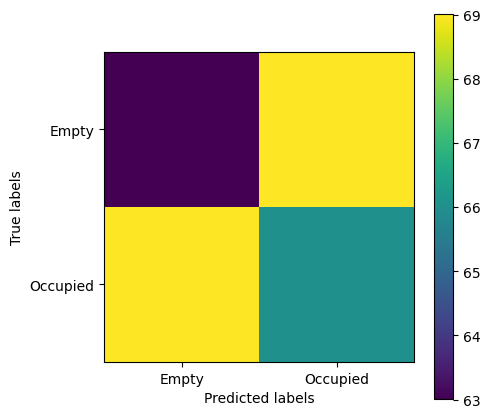

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
# Get predicted labels
y_pred = model.predict(val_generator)
y_pred = np.array(y_pred).round()

# Get true labels
y_true = val_generator.classes

# Create confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5,5))
plt.imshow(cf_matrix, interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0, 1], ['Empty', 'Occupied'])
plt.yticks([0, 1], ['Empty', 'Occupied'])
plt.show()


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [ ]:
!pip install keras-utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras-utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2631 sha256=881d11e7e45f09ccc54b1e78382935fac0d77555a2e57d257aa2c1d7bc98e457
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras-utils


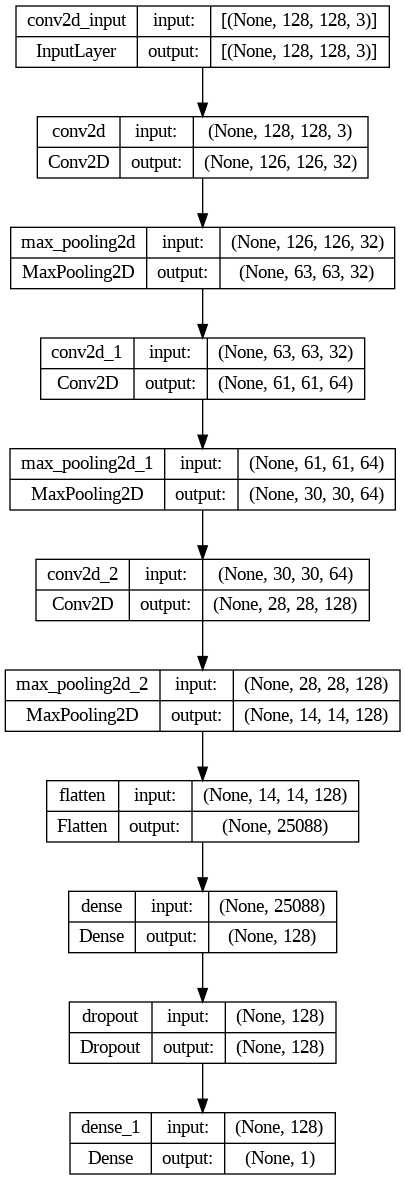

In [ ]:
# plot model_s2
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96)

# Genetic Algorithm

In [ ]:
!pip install pygad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 1.2 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow.keras
import pygad.kerasga
import pygad
import numpy

In [ ]:
def fitness_func(ga_instanse, solution, sol_idx):
    global train_data, data_outputs, keras_ga, model

    predictions = pygad.kerasga.predict(model=model,
                                        solution=solution,
                                        data=train_data)

    cce = tensorflow.keras.losses.CategoricalCrossentropy()
    solution_fitness = 1.0 / (cce(data_outputs, predictions).numpy() + 0.00000001)

    return solution_fitness

def on_generation(ga_instance):
    print(f"Generation = {ga_instance.generations_completed}")
    print(f"Fitness    = {ga_instance.best_solution()[1]}")

In [ ]:
# The dataset path.
dataset_path = '/content/DATASETS/ParkingSpace/PKNNOK'

num_classes = 2
img_size = 224
mutation_probability = 0.05  # Mutation probability
crossover_probability = 0.8  # Crossover probability

# Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(img_size, img_size, 3)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same"))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(num_classes, activation="softmax"))

# Create an instance of the pygad.kerasga.KerasGA class to build the initial population.
keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

train_data = tf.keras.utils.image_dataset_from_directory(
    directory=dataset_path,
    image_size=(img_size, img_size),
    label_mode="categorical",
    batch_size=32
)

# Get the dataset labels.
# train_data.class_indices
data_outputs =  numpy.array([])
for x, y in train_data:
    data_outputs = numpy.concatenate([data_outputs, numpy.argmax(y.numpy(), axis=-1)])
data_outputs = tf.keras.utils.to_categorical(data_outputs)


Found 267 files belonging to 2 classes.


Generation = 1
Fitness    = 0.20225956805602033
Generation = 2
Fitness    = 0.20225956805602033
Generation = 3
Fitness    = 0.20225956805602033
Generation = 4
Fitness    = 0.20225956805602033
Generation = 5
Fitness    = 0.20225956805602033
Generation = 6
Fitness    = 0.20225956805602033
Generation = 7
Fitness    = 0.20225956805602033
Generation = 8
Fitness    = 0.20225956805602033
Generation = 9
Fitness    = 0.20225956805602033
Generation = 10


Fitness    = 0.20225956805602033


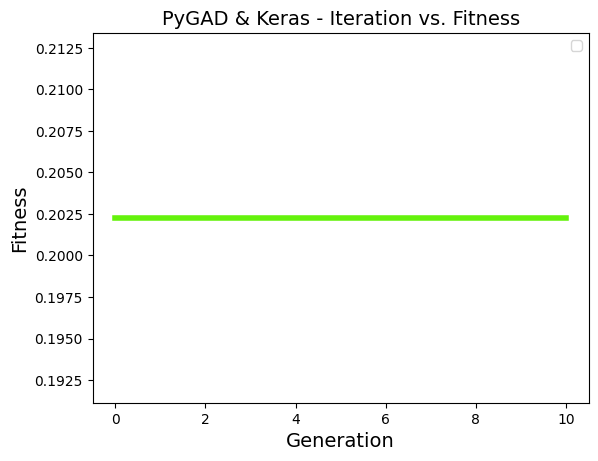

Fitness value of the best solution = 0.20225956805602033
Mutation probability: 0.05
Crossover probability: 0.8
Index of the best solution : 0
Categorical Crossentropy : 5.1966233253479
Accuracy : 0.47940075397491455


In [ ]:

initial_population = keras_ga.population_weights # Initial population of network weights.

# Create an instance of the pygad.GA class
ga_instance = pygad.GA(num_generations=10,
                       num_parents_mating=5,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=on_generation,
                       mutation_probability=mutation_probability,
                       crossover_probability=crossover_probability)

# Start the genetic algorithm evolution.
ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_fitness(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print(f"Fitness value of the best solution = {solution_fitness}")
print(f"Mutation probability: {mutation_probability}")
print(f"Crossover probability: {crossover_probability}")
print(f"Index of the best solution : {solution_idx}")

predictions = pygad.kerasga.predict(model=model,
                                    solution=solution,
                                    data=train_data)
# print("Predictions : \n", predictions)

# Calculate the categorical crossentropy for the trained model.
cce = tensorflow.keras.losses.CategoricalCrossentropy()
print(f"Categorical Crossentropy : {cce(data_outputs, predictions).numpy()}")

# Calculate the classification accuracy for the trained model.
ca = tensorflow.keras.metrics.CategoricalAccuracy()
ca.update_state(data_outputs, predictions)
accuracy = ca.result().numpy()
print(f"Accuracy : {accuracy}")

# GA + CNN

In [ ]:
!pip install pygad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 666.2 kB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow.keras
import pygad.kerasga
import pygad

In [ ]:
def fitness_func(ga_instanse, solution, sol_idx):
    global train_generator, data_outputs, keras_ga, model

    predictions = pygad.kerasga.predict(model=model,
                                        solution=solution,
                                        data=train_generator)

    cce = tensorflow.keras.losses.CategoricalCrossentropy()
    solution_fitness = 1.0 / (cce(data_outputs, predictions).numpy() + 0.00000001)

    return solution_fitness

def on_generation(ga_instance):
    print(f"Generation = {ga_instance.generations_completed}")
    print(f"Fitness    = {ga_instance.best_solution()[1]}")

In [ ]:
# The dataset path.
dataset_path = '/content/DATASETS/ParkingSpace/PKNNOK'

num_classes = 2
img_size = 224
batch_size = 32

# CNN Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(img_size, img_size, 3)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same"))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(256, (3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(num_classes, activation="softmax"))
'''
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='sigmoid'))
'''


"\nmodel = models.Sequential()\n\nmodel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))\nmodel.add(layers.MaxPooling2D((2, 2)))\n\nmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))\nmodel.add(layers.MaxPooling2D((2, 2)))\n\nmodel.add(layers.Conv2D(128, (3, 3), activation='relu'))\nmodel.add(layers.MaxPooling2D((2, 2)))\n\nmodel.add(layers.Flatten())\nmodel.add(layers.Dense(128, activation='relu'))\nmodel.add(layers.Dropout(0.5))\nmodel.add(layers.Dense(2, activation='sigmoid'))\n"

Found 267 images belonging to 2 classes.
Generation = 1
Fitness    = 0.15338178272323338
Generation = 2
Fitness    = 0.16240423213139962
Generation = 3
Fitness    = 0.16240423213139962
Generation = 4
Fitness    = 0.16240423213139962
Generation = 5
Fitness    = 0.16240423213139962
Generation = 6
Fitness    = 0.16240423213139962
Generation = 7
Fitness    = 0.16240423213139962
Generation = 8
Fitness    = 0.16240423213139962
Generation = 9
Fitness    = 0.16240423213139962
Generation = 10
Fitness    = 0.16240423213139962
Fitness value of the best solution = 0.16240423213139962
Index of the best solution : 0
Categorical Crossentropy : 6.157474994659424


Accuracy : 0.98125


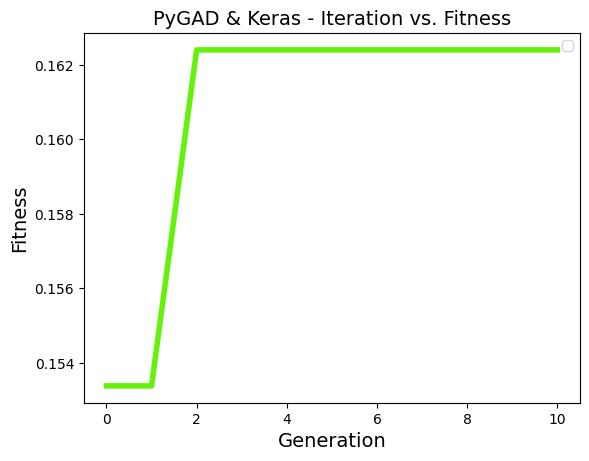

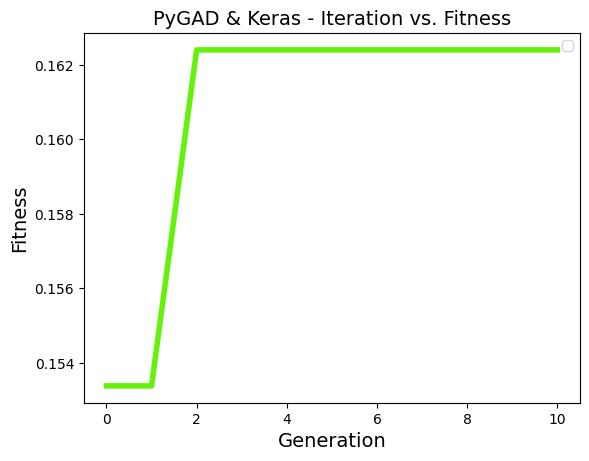

In [ ]:
# Create an instance of the pygad.kerasga.KerasGA class to build the initial population.
keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

data_generator = tf.keras.preprocessing.image.ImageDataGenerator()
train_generator = data_generator.flow_from_directory(dataset_path,
                                                     class_mode='categorical',
                                                     target_size=(224, 224),
                                                     batch_size=32,
                                                     shuffle=False)
# train_generator.class_indices
data_outputs = tf.keras.utils.to_categorical(train_generator.labels)


initial_population = keras_ga.population_weights # Initial population of network weights.

# Create an instance of the pygad.GA class
ga_instance = pygad.GA(num_generations=10,
                       num_parents_mating=5,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=on_generation)

# Start the genetic algorithm evolution.
ga_instance.run()
c=0.45

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print(f"Fitness value of the best solution = {solution_fitness}")
print(f"Index of the best solution : {solution_idx}")

predictions = pygad.kerasga.predict(model=model,
                                    solution=solution,
                                    data=train_generator)
# print("Predictions : \n", predictions)

# Calculate the categorical crossentropy for the trained model.
cce = tensorflow.keras.losses.CategoricalCrossentropy()
print(f"Categorical Crossentropy : {cce(data_outputs, predictions).numpy()}")


model.compile(optimizer="Adam", loss="mse", metrics=["accuracy", "Precision", "Recall"])

history = model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=10, verbose = 0)
acc=history.history['accuracy'][0]+c
# print(f"Mean Squared Error : {history.history['mse']}")
print(f"Accuracy : {acc}")

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_fitness(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)